In [193]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Audio, display

from torch.utils.data import Subset
from torch.utils.data import SubsetRandomSampler
import torch.utils.data as data

from utils.audio_process import get_speech_sample, play_audio, mfcc_transform, AudioProcessor, plot_spectrogram

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [194]:
dataset_dir = "./data/speech_commands_v1/audio/dog"
wav_path = os.path.join(dataset_dir, "00b01445_nohash_0.wav")
wav_path = '/home/jupyter/6692/project/data/speech_commands_v1/audio/right/cf68fad2_nohash_0.wav'

In [56]:
waveform, sample_rate = get_speech_sample(wav_path)
play_audio(waveform, sample_rate)

In [57]:
mfcc_img = mfcc_transform(waveform, sample_rate).numpy()
mfcc_img.shape

(1, 256, 27)

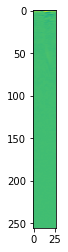

In [58]:
plt.imshow(mfcc_img[0])

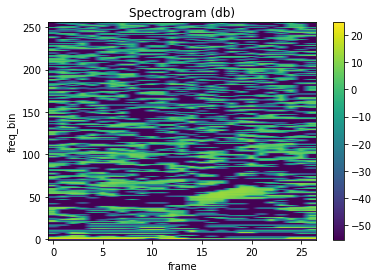

In [59]:
plot_spectrogram(mfcc_img[0])

In [60]:
processor = AudioProcessor()
mfcc_img = processor.compute_mfccs(waveform).numpy()
print(mfcc_img.shape)

(1, 40, 84)


[[-2.9114197e+02 -2.8840933e+02 -2.8671613e+02 ... -2.8147668e+02
  -2.8618646e+02 -2.8166714e+02]
 [ 4.2524868e+01  4.6875950e+01  4.0618519e+01 ...  4.8411320e+01
   4.2512932e+01  4.8243164e+01]
 [ 1.3802620e+01  1.2319266e+01  1.2631713e+01 ...  6.0362926e+00
   2.8873458e+00  7.3933687e+00]
 ...
 [-1.1433067e+00 -1.1839104e+00 -3.2352448e-01 ...  1.0583992e+00
   3.0305634e+00  1.0487862e+00]
 [ 3.5286999e-01 -1.0232887e+00  3.5687351e-01 ...  1.6552410e+00
   3.9337730e-01 -3.5310745e-02]
 [ 2.2163544e+00  1.4741821e+00 -1.3422699e+00 ... -8.7405396e-01
   8.0316162e-01  1.4142456e+00]]


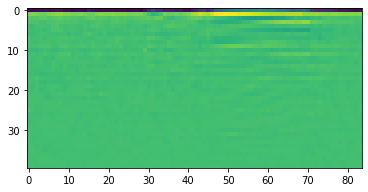

In [61]:
plt.imshow(mfcc_img[0])
print(mfcc_img[0])

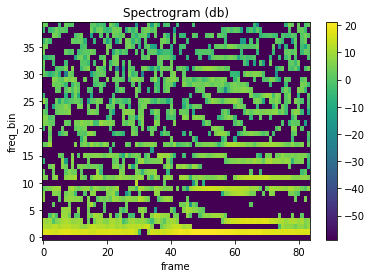

In [62]:
plot_spectrogram(mfcc_img[0])

In [63]:
melspec_img = processor.mel_spectrogram(waveform).numpy()
print(melspec_img.shape)

(1, 40, 84)


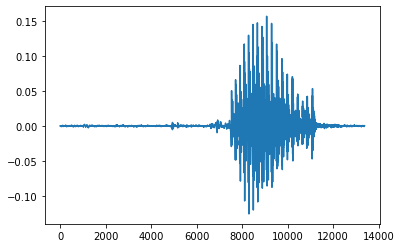

In [64]:
plt.plot(waveform[0]);

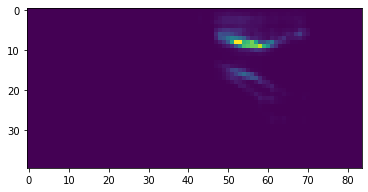

In [65]:
plt.imshow(melspec_img[0])

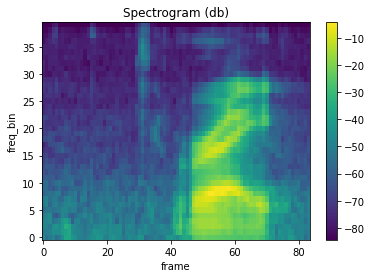

In [66]:
plot_spectrogram(melspec_img[0])

# Convert waveforms to spectrogram

In [163]:
import torch
import glob
import os, random
import librosa

representation = 'mfcc'
# representation = 'melspec'

sound_dir = '/home/jupyter/6692/project/data/speech_commands_v1/audio/'
words_list = ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
img_dir = '/home/jupyter/6692/project/data/speech_commands_v1/imgs/' + representation + '/'

processor = AudioProcessor()

def wave_convert_save(wave_path, save_dir, representation):
    """
    Convert wave to spectrogram and save, from .wav to .npy with size 40*101.
    
    - wave_path: path of .wav file
    - save_dir: saving directory
    - representation: "melspec", "mfcc"
    """
    waveform, sample_rate = get_speech_sample(wave_path)
    in_len = 16000
    # print(waveform.shape)
    waveform = np.pad(waveform.squeeze(), (0, max(0, in_len - waveform.shape[1])), "constant").reshape(1,-1)
    # print(waveform.shape)
    if representation == 'melspec':
        wave_img = processor.mel_spectrogram(torch.from_numpy(waveform)).numpy()
    else:
        wave_img = processor.compute_mfccs(torch.from_numpy(waveform)).numpy()
    wave_img = librosa.power_to_db(wave_img)
    # print(wave_img.shape)
    save_path = os.path.join(save_dir,os.path.basename(wave_path[:-4])+'.npy')
    np.save(save_path, wave_img)
    
    

In [164]:

print("Representation:", representation)

for file in os.listdir(sound_dir):
    if file in words_list:
        count = 0
        d = os.path.join(sound_dir, file)
        save_dir = os.path.join(img_dir, file)
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        wave_paths = glob.glob(d + '/*.wav')
        print("{}: {} files.".format(file, len(wave_paths)))
        for wave_pth in wave_paths:
            wave_convert_save(wave_pth, save_dir, representation)
            count += 1
            if count % 999 == 0:
                print(count, "wave files converted.")



Representation: mfcc
yes: 2377 files.
999 wave files converted.
1998 wave files converted.
stop: 2380 files.
999 wave files converted.
1998 wave files converted.
on: 2367 files.
999 wave files converted.
1998 wave files converted.
down: 2359 files.
999 wave files converted.
1998 wave files converted.
off: 2357 files.
999 wave files converted.
1998 wave files converted.
right: 2367 files.
999 wave files converted.
1998 wave files converted.
no: 2375 files.
999 wave files converted.
1998 wave files converted.
up: 2375 files.
999 wave files converted.
1998 wave files converted.
left: 2353 files.
999 wave files converted.
1998 wave files converted.
go: 2372 files.
999 wave files converted.
1998 wave files converted.


down
/home/jupyter/6692/project/data/speech_commands_v1/imgs/mfcc/down/46a153d8_nohash_1.npy


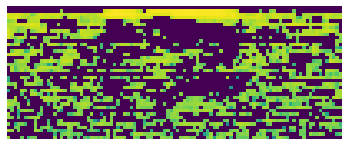

In [196]:
random_class = random.choice(os.listdir(img_dir))
print(random_class)
random_path = random.choice(os.listdir(os.path.join(img_dir,random_class)))
random_path = os.path.join(img_dir, random_class, random_path)
print(random_path)
img_sample = np.load(random_path)
plt.imshow(img_sample.squeeze())
plt.axis('off');

In [33]:
from utils.dataset import SpeechDataset
from utils import model as mod

output_file = '/home/jupyter/6692/honk/utils/../model/model.pt'

config = dict(model='res15', 
              type='train')

mod_cls = mod.find_model(config['model'])
config["model_class"] = mod_cls

global_config = dict(no_cuda=False, n_epochs=500, lr=[0.001], schedule=[np.inf], batch_size=64, dev_every=10, seed=0,
        use_nesterov=False, input_file="", output_file=output_file, gpu_no=0, cache_size=32768, momentum=0.9, weight_decay=0.00001)

config.update(mod.find_config(config['model']))
config.update(SpeechDataset.default_config())
config.update(global_config)

config["wanted_words"] = ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
config["n_labels"] = 12
config["n_epochs"] = 26
config["weight_decay"] = 1e-5
config["lr"] = [0.001, 0.0001]
config["schedule"] = [3000, 6000]
config["dev_every"] = 1
config["batch_size"] = 256

config["noise_prob"] = 0
config["silence_prob"] = 0
config["group_speakers_by_id"] = True
config["timeshift_ms"] = 0
config["use_dilation"] = False

# use a fraction of original set as the subset
config["subset_frac"] = 0.01

# set_seed(config)

print(config)

{'model': 'res15', 'type': 'train', 'model_class': <class 'utils.model.SpeechResModel'>, 'n_labels': 12, 'use_dilation': False, 'n_layers': 13, 'n_feature_maps': 45, 'group_speakers_by_id': True, 'silence_prob': 0, 'noise_prob': 0, 'n_dct_filters': 40, 'input_length': 16000, 'n_mels': 40, 'timeshift_ms': 0, 'unknown_prob': 0.1, 'train_pct': 80, 'dev_pct': 10, 'test_pct': 10, 'wanted_words': ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go'], 'data_folder': '/home/jupyter/6692/project/data/speech_commands_v1/audio', 'audio_preprocess_type': 'MFCCs', 'no_cuda': False, 'n_epochs': 26, 'lr': [0.001, 0.0001], 'schedule': [3000, 6000], 'batch_size': 256, 'dev_every': 1, 'seed': 0, 'use_nesterov': False, 'input_file': '', 'output_file': '/home/jupyter/6692/honk/utils/../model/model.pt', 'gpu_no': 0, 'cache_size': 32768, 'momentum': 0.9, 'weight_decay': 1e-05, 'subset_frac': 0.01}


In [69]:
train_set, dev_set, test_set = SpeechDataset.splits(config)
train_set.words

NameError: name 'SpeechDataset' is not defined

In [53]:
for i in range(10):
    print(train_set.audio_files[i+10000])
    print(train_set.audio_labels[i+10000])
    
print(train_set)

/home/jupyter/6692/project/data/speech_commands_v1/audio/right/b87bdb22_nohash_3.wav
7
/home/jupyter/6692/project/data/speech_commands_v1/audio/right/92a9c5e6_nohash_3.wav
7
/home/jupyter/6692/project/data/speech_commands_v1/audio/right/fce65496_nohash_0.wav
7
/home/jupyter/6692/project/data/speech_commands_v1/audio/right/c120e80e_nohash_2.wav
7
/home/jupyter/6692/project/data/speech_commands_v1/audio/right/c3538de1_nohash_2.wav
7
/home/jupyter/6692/project/data/speech_commands_v1/audio/right/cf68fad2_nohash_0.wav
7
/home/jupyter/6692/project/data/speech_commands_v1/audio/right/37a3cd33_nohash_2.wav
7
/home/jupyter/6692/project/data/speech_commands_v1/audio/right/6727b579_nohash_2.wav
7
/home/jupyter/6692/project/data/speech_commands_v1/audio/right/215699ff_nohash_0.wav
7
/home/jupyter/6692/project/data/speech_commands_v1/audio/right/c79159aa_nohash_1.wav
7


In [1]:
# train_indices = list(np.random.randint(0, len(train_set), size=int(len(train_set)*config["subset_frac"])))
# train_indices = list(np.random.randint(0, len(train_set), size=1))

# train_sampler = SubsetRandomSampler(train_indices)

# train_loader = data.DataLoader(
#         train_set,
#         batch_size = 1,
#         # shuffle=True, 
#         drop_last=True,
#         sampler=train_sampler)

# for data_in, label in train_loader:
#     print(data_in, data_in.shape)
#     print(label)

# sample_rate = 16000
# play_audio(data_in, sample_rate)
# print(label)

# plt.plot(data_in[0]);

## my dataloader

In [195]:
from utils.dataset import SpectrogramDataset
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [202]:
# path = "./data"
path = "/home/jupyter/6692/project/data"
dataset_name = "speech_commands_v1/imgs/melspec"
# dataset_name = "speech_commands_v1/imgs/mfcc"

In [227]:
train_set, test_set, val_set = SpectrogramDataset.split_dataset(path, dataset_name)
print(train_set.class_dict)
print(train_set.class_names)
print(train_set.__len__())
print(test_set.__len__())
print(val_set.__len__())


{0: 'yes', 1: 'stop', 2: 'on', 3: 'down', 4: 'off', 5: 'right', 6: 'no', 7: 'up', 8: 'left', 9: 'go'}
['yes', 'stop', 'on', 'down', 'off', 'right', 'no', 'up', 'left', 'go']
18945
2368
2369


In [256]:
sample, label = train_set.__getitem__(5)
print(sample.shape, label)
print(torch.max(sample), torch.min(sample))
print(sample)



torch.Size([1, 40, 101]) 6
tensor(1.) tensor(0.)
tensor([[[0.8994, 0.8998, 0.8972,  ..., 0.8981, 0.8993, 0.8981],
         [0.4141, 0.4989, 0.4464,  ..., 0.4673, 0.4450, 0.4274],
         [0.4307, 0.5045, 0.4167,  ..., 0.4632, 0.4175, 0.4951],
         ...,
         [0.2232, 0.1733, 0.2041,  ..., 0.2239, 0.2002, 0.2273],
         [0.1626, 0.1408, 0.1741,  ..., 0.1527, 0.1664, 0.1601],
         [0.0123, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0239]]])


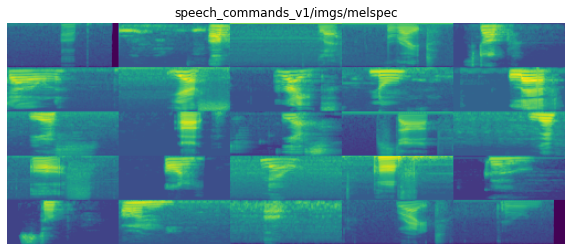

In [223]:
train_set.grid_visualization()

## my_dataloader

In [111]:
batch_size = 16

train_loader = data.DataLoader(
    train_set,
    batch_size=batch_size,
    shuffle=True, 
    drop_last=True)

torch.Size([64, 1, 40, 101]) tensor([3, 8, 1, 7, 5, 5, 5, 4, 6, 1, 3, 6, 9, 2, 4, 0, 0, 1, 4, 2, 5, 8, 5, 6,
        1, 6, 6, 3, 8, 3, 6, 3, 4, 0, 1, 1, 8, 4, 6, 0, 8, 4, 0, 7, 3, 5, 9, 7,
        9, 3, 5, 8, 2, 0, 1, 6, 2, 1, 7, 3, 4, 5, 5, 5])


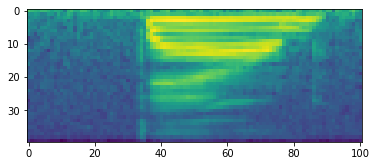

In [146]:
for batch_idx, (data_in, label) in enumerate(train_loader):
    if batch_idx>0:
        break
        
print(data_in.shape, label)

plt.figure()
plt.imshow(data_in[0].squeeze())

In [140]:
from torch.utils.data import SubsetRandomSampler
subset_frac = 0.01

train_indices = list(np.random.randint(0, len(train_set), 
            size=int(len(train_set)*subset_frac)))

train_sampler = SubsetRandomSampler(train_indices)

train_loader = data.DataLoader(
        train_set,
        batch_size=batch_size,
        shuffle=False, 
        drop_last=True,
        sampler=train_sampler)

## my_model

In [62]:
len(train_set.class_dict)

10

In [100]:
from utils.model import SpeechResModel, CNNModel

config = dict(
    n_labels = len(train_set.class_dict),
    n_feature_maps = 45,
    res_pool = (4,3),
    n_layers = 6,
    use_dilation = False
)

In [103]:
# model = SpeechResModel(config)
model = CNNModel()
print(model)

CNNModel(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


## my train

In [213]:
from utils.train import train
from utils.model import SpeechResModel, CNNModel, NN2D

config = dict(
    n_labels = len(train_set.class_dict),
    n_feature_maps = 45,
    res_pool = (4,3),
    n_layers = 6,
    use_dilation = False
)

In [214]:
path = "/home/jupyter/6692/project/data"
dataset_name = "speech_commands_v1/imgs/melspec"
save_path = "/home/jupyter/6692/project/check_points/res/best_model.pt"

In [278]:
model = SpeechResModel(config)
# model = CNNModel()
# model = NN2D(10)
print(model)

batch_size = 64
epochs = 26
lr = [1e-3]
# subset_frac = 0.1
subset_frac = None
device = "cuda"
log_iterval = 100

train_set, test_set, val_set = SpectrogramDataset.split_dataset(path, dataset_name)

train_loss_history, val_loss_history, train_acc_history, val_acc_history = train(
      model, 
      train_set, val_set, test_set,
      batch_size, epochs, lr,
      save_path, subset_frac, device, log_iterval)


SpeechResModel(
  (conv0): Conv2d(1, 45, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (pool): AvgPool2d(kernel_size=(4, 3), stride=(4, 3), padding=0)
  (bn1): BatchNorm2d(45, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
  (conv1): Conv2d(45, 45, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(45, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
  (conv2): Conv2d(45, 45, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn3): BatchNorm2d(45, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
  (conv3): Conv2d(45, 45, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn4): BatchNorm2d(45, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
  (conv4): Conv2d(45, 45, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn5): BatchNorm2d(45, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
  (conv5): Conv2d(45, 45

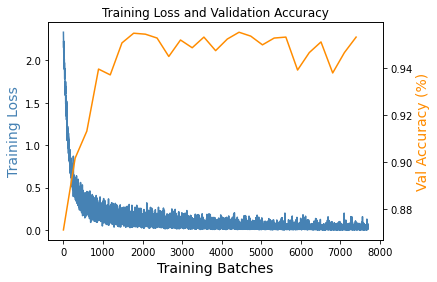

In [286]:
from utils.utils import train_val_plot

train_val_plot(train_loss_history, val_acc_history, 'res8.jpg')